In [1]:
import pandas as pd
import fanc
import fanc.plotting as fancplot
import matplotlib.pyplot as plt
from matplotlib import patches
import numpy as np
import seaborn as sns
import matplotlib
import re
import scipy
import glob

%matplotlib inline

### 1. Load data
First Capture-C experiments at 10kb resolution

In [2]:
WT = fanc.load("../results/capture/WT_limbs/WT.hic@10000@KR")
F1F2 = fanc.load("../results/capture/F1F2_limbs/F1F2_limbs.hic@10000@KR")
R1F2 = fanc.load("../results/capture/R1F2_limbs/R1F2_limbs.hic@10000@KR")
ALL = fanc.load("../results/capture/ALL_limbs/ALL_limbs.hic@10000@KR")
DelBs = fanc.load("../results/capture/DelBs_limbs/DelBs_limbs.hic@10000@KR")
DelB_DelB = fanc.load("../results/capture/DelB_limbs/delb/DelB_limbs.hic@10000@KR")
DelB = fanc.load("../results/capture/DelB_limbs/delbs/DelB_limbs.hic@10000@KR")
F1F2inv = fanc.load("../results/capture/F1F2inv_limbs/inv/F1F2inv_limbs_inv.hic@10000@KR")
R1_4 = fanc.load("../results/capture/R1-4_limbs/R1-4_limbs.hic@10000@KR")
FALLR124 = fanc.load("../results/capture/FALL_R124_r1/FALL_R124_limbs.hic@10000@KR")

In [3]:
binsize=10000
coordBins = (4300000//binsize,6200000//binsize)

In [4]:
def getFlatten(hic,exclude):
    excludeStart, excludeEnd = exclude
    hicMat = hic.matrix()
    flattenStart = hicMat[:excludeStart,:excludeStart].flatten()
    flattenEnd = hicMat[excludeEnd:,excludeEnd:].flatten()
    flatten = np.concatenate([flattenStart,flattenEnd],axis=None)
    return(flatten)

In [5]:
f1f2 = getFlatten(F1F2,coordBins)
r1f2 = getFlatten(R1F2,coordBins)
alld = getFlatten(ALL,coordBins)
delbs = getFlatten(DelBs,coordBins)
delb = getFlatten(DelB,coordBins)
inv = getFlatten(F1F2inv,coordBins)
rall = getFlatten(R1_4,coordBins)
fallr124 = getFlatten(FALLR124,coordBins)

([<matplotlib.axis.YTick at 0x2ba996bf4f50>,
 [Text(0, 0.5, 'DelBs'),
  Text(0, 1.5, 'DelBsΔR1-F2'),
  Text(0, 2.5, 'DelBsΔR-all'),
  Text(0, 3.5, 'DelBsΔF-all'),
  Text(0, 4.5, 'DelBsΔF-all-Inv'),
  Text(0, 5.5, 'DelBsΔAll'),
  Text(0, 6.5, 'R3-only')])

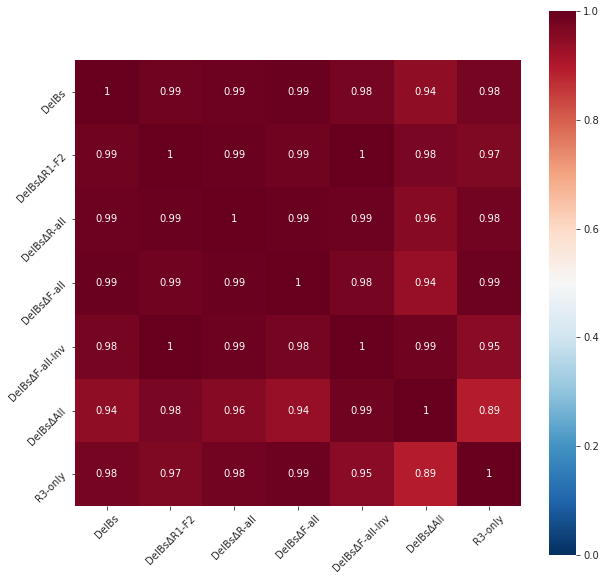

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(np.corrcoef([delbs.data,
                         r1f2.data,
                         rall.data,
                         f1f2.data,
                         inv.data,
                         alld.data,
                         fallr124.data]),
            vmin=0,
            annot=True,
            cmap="RdBu_r",
            square=True)
labels = ["DelBs","DelBsΔR1-F2","DelBsΔR-all","DelBsΔF-all","DelBsΔF-all-Inv","DelBsΔAll","R3-only"]
ticks = [x + 0.5 for x in range(7)]
plt.xticks(ticks=ticks,labels=labels,rotation=45)
plt.yticks(ticks=ticks,labels=labels,rotation=45)